In [1]:
from train import *
from addict import Dict
import logging
from utils.construct_tff import construct_real_tff
import matplotlib.pyplot as plt
from utils.data_utils import get_loader
!export CUDA_VISIBLE_DEVICES=4

In [9]:
seed = 42
torch.manual_seed(seed)
import random 
random.seed(seed)
np.random.seed(seed)
torch.use_deterministic_algorithms(True)

In [10]:
wmat = torch.randn(4,4)
U,S,Vh = torch.linalg.svd(wmat)
print(S)

tensor([3.9052, 2.2860, 1.6020, 0.3335])


In [11]:
projs_test = torch.matmul(U.transpose(0,1), wmat)
norms = torch.norm(projs_test, dim=1)
print(norms)

tensor([3.9052, 2.2860, 1.6020, 0.3335])


In [12]:
k_attn = 2048
l_attn = 2
n_attn = 4
tffs = construct_real_tff(k_attn, l_attn // 2, n_attn // 2)
frame_cat = tffs.view(-1, n_attn)
normalized_frames = frame_cat / torch.norm(frame_cat, dim=1).view(-1,1)

In [13]:
align_with_top = torch.matmul(normalized_frames, U[:,0])
sorted_aligns, align_sorted_indices = torch.sort(align_with_top, descending=True)
print(f'alignment of the frame vectors with the SVD first direction')
print(sorted_aligns[:10])
print(align_sorted_indices[:10])

projs_per_dir = torch.matmul(frame_cat, wmat)
norms_per_dir = torch.norm(projs_per_dir, dim=1)
sorted_norms, norm_sorted_indices = torch.sort(norms_per_dir, descending=True)
print(f'norms per directions')
print(sorted_norms[:10])
print(norm_sorted_indices[:10])

projs_per_frame = torch.matmul(tffs, wmat)
norms_per_frame = torch.norm(projs_per_frame, dim=(1,2))
sorted_norms_f, norm_sorted_indices_f = torch.sort(norms_per_frame, descending=True)
print(f'norms per frame')
print(sorted_norms_f[:10])
print(norm_sorted_indices_f[:10])

alignment of the frame vectors with the SVD first direction
tensor([0.1661, 0.1661, 0.1661, 0.1661, 0.1661, 0.1661, 0.1661, 0.1661, 0.1661,
        0.1661])
tensor([3583, 3581, 3585, 3579, 3587, 3577, 3589, 3575, 3591, 3573])
norms per directions
tensor([0.1162, 0.1162, 0.1162, 0.1162, 0.1162, 0.1162, 0.1162, 0.1162, 0.1162,
        0.1162])
tensor([434, 432, 436, 430, 438, 428, 440, 426, 442, 424])
norms per frame
tensor([0.1272, 0.1272, 0.1272, 0.1272, 0.1272, 0.1272, 0.1272, 0.1272, 0.1272,
        0.1272])
tensor([334, 333, 335, 332, 336, 331, 337, 330, 338, 329])


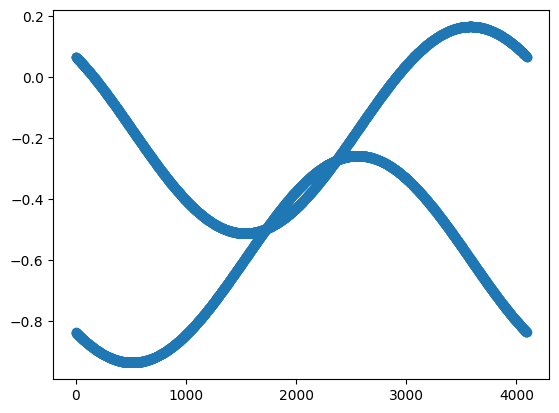

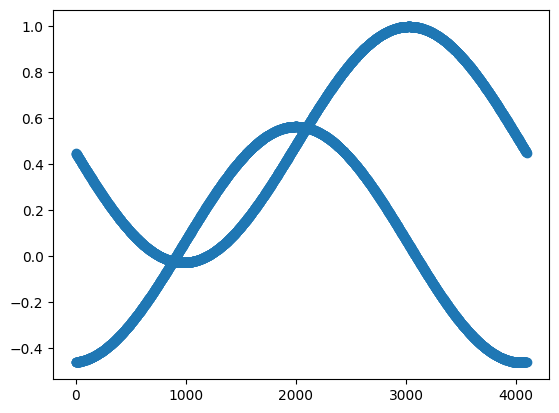

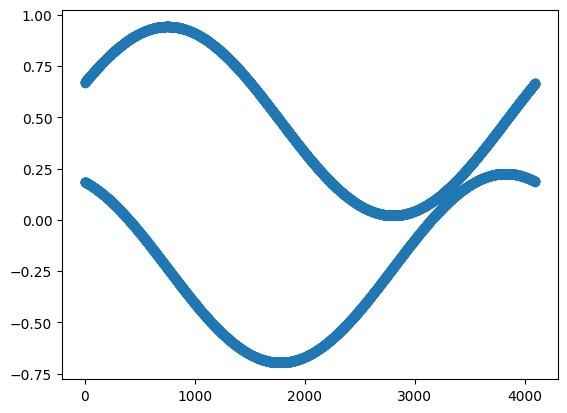

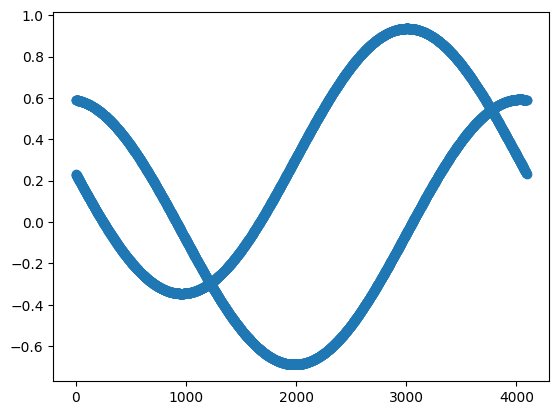

In [14]:
align_with_0 = torch.matmul(normalized_frames, U[:,0])
plt.scatter(range(k_attn*l_attn),align_with_0)
plt.show()
align_with_1 = torch.matmul(normalized_frames, U[:,1])
plt.scatter(range(k_attn*l_attn),align_with_1)
plt.show()
align_with_2 = torch.matmul(normalized_frames, U[:,2])
plt.scatter(range(k_attn*l_attn),align_with_2)
plt.show()
align_with_3 = torch.matmul(normalized_frames, U[:,3])
plt.scatter(range(k_attn*l_attn),align_with_3)
plt.show()

In [15]:
print((norms_per_dir**2).sum())
print((norms_per_frame**2).sum())
print((S**2).sum())

tensor(23.1540)
tensor(23.1540)
tensor(23.1540)
